# Análisis exploratorio de datos

In [171]:
#Instalación de las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
#Lectura de los datos
data = pd.read_csv('../EDA/solicitudes_credito_simuladas.csv')
data

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final
0,1,61,1733912,Bogotá,1,525,Vacaciones familiares,RECHAZADO
1,2,68,1659791,Santander,0,702,Pago de deudas,APROBADO
2,3,22,1585972,Antioquia,0,658,Eventos especiales,APROBADO
3,4,56,2467971,Santander,1,512,Compra de vehículo,APROBADO
4,5,21,2139319,Cundinamarca,1,542,Viaje a Europa,RECHAZADO
...,...,...,...,...,...,...,...,...
95,96,50,4453863,Santander,1,565,Vacaciones familiares,RECHAZADO
96,97,38,4581601,Antioquia,1,691,Eventos especiales,RECHAZADO
97,98,42,1040753,Cundinamarca,1,493,Compra de vehículo,RECHAZADO
98,99,43,2967217,Valle,1,705,Reparación de vivienda,APROBADO


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  100 non-null    int64 
 1   edad                100 non-null    int64 
 2   ingresos_mensuales  100 non-null    int64 
 3   region              100 non-null    object
 4   es_cliente          100 non-null    int64 
 5   score_crediticio    100 non-null    int64 
 6   justificacion       100 non-null    object
 7   decision_final      100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [174]:
#Estructuración de cada tipo de dato
data['id'] = data['id'].astype('str')
data['es_cliente'] = data['es_cliente'].astype('bool')
data['decision_final_num'] = data['decision_final'].map({'APROBADO':1,'RECHAZADO':0}).astype('int')
data['decision_final'] = pd.Categorical(data['decision_final'], categories=['RECHAZADO', 'APROBADO'], ordered=True)
data.head()

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final,decision_final_num
0,1,61,1733912,Bogotá,True,525,Vacaciones familiares,RECHAZADO,0
1,2,68,1659791,Santander,False,702,Pago de deudas,APROBADO,1
2,3,22,1585972,Antioquia,False,658,Eventos especiales,APROBADO,1
3,4,56,2467971,Santander,True,512,Compra de vehículo,APROBADO,1
4,5,21,2139319,Cundinamarca,True,542,Viaje a Europa,RECHAZADO,0


In [175]:
data.describe()

,edad,ingresos_mensuales,score_crediticio,decision_final_num
count,100.000000,1.000000e+02,100.000000,100.000000
mean,47.140000,2.896936e+06,577.600000,0.490000
std,14.731276,1.199490e+06,100.190122,0.502418
min,21.000000,8.180800e+05,403.000000,0.000000
25%,36.750000,1.852574e+06,494.500000,0.000000
50%,47.000000,2.848682e+06,580.500000,0.000000
75%,60.000000,3.911938e+06,659.500000,1.000000
max,70.000000,4.912109e+06,750.000000,1.000000


## Análisis visual de los datos

In [176]:
custom_palette = {'RECHAZADO': '#FBDC52', 'APROBADO': '#277F37'}

<Figure size 1200x800 with 0 Axes>

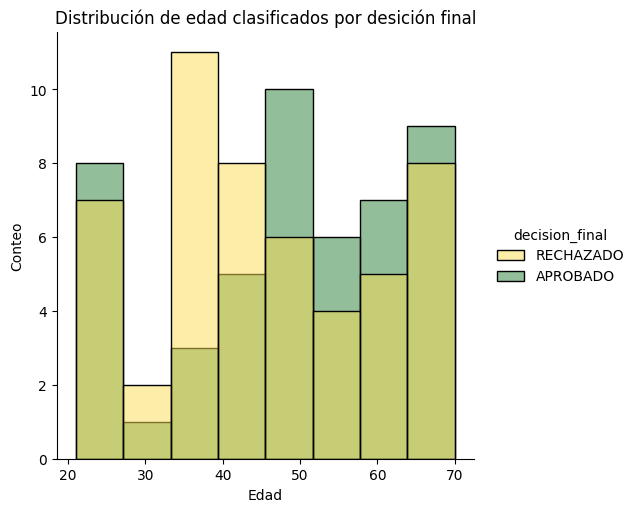

In [177]:
#Análisis sobre la edad
fig = plt.figure(figsize=(12,8))
sns.displot(data=data,x='edad',hue='decision_final',palette=custom_palette)
plt.title('Distribución de edad clasificados por desición final')
plt.xlabel('Edad')
plt.ylabel('Conteo')
plt.show()

## Rango 1: Entre los 28 y los 45 años

In [178]:
data_ranI = data[(data['edad']>28) & (data['edad']<=45)]
data_ranI.shape

(30, 9)

In [179]:
data_ranI.describe()

,edad,ingresos_mensuales,score_crediticio,decision_final_num
count,30.000000,3.000000e+01,30.000000,30.000000
mean,38.700000,2.856683e+06,576.733333,0.300000
std,4.457849,1.271747e+06,108.625244,0.466092
min,29.000000,8.180800e+05,415.000000,0.000000
25%,36.000000,1.819040e+06,453.500000,0.000000
50%,38.000000,2.824064e+06,604.500000,0.000000
75%,43.000000,4.028538e+06,667.750000,1.000000
max,45.000000,4.871951e+06,743.000000,1.000000


In [180]:
#Cuadrante I
CuadI_RI= data_ranI[(data_ranI['score_crediticio']>=600)&(data_ranI['ingresos_mensuales']>=1500000)].sort_values(by='edad',ascending=True)
CuadI_RI.reset_index(drop=True, inplace=True)
CuadI_RI

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final,decision_final_num
0,33,29,4338999,Antioquia,True,636,Vacaciones familiares,RECHAZADO,0
1,56,31,1706771,Cundinamarca,False,640,Vacaciones familiares,RECHAZADO,0
2,42,36,3028136,Cundinamarca,False,743,Reparación de vivienda,RECHAZADO,0
3,45,36,3899817,Valle,False,624,Tratamiento médico,RECHAZADO,0
4,15,37,1971304,Antioquia,True,699,Pago de deudas,RECHAZADO,0
5,29,38,4871951,Antioquia,False,692,Eventos especiales,RECHAZADO,0
6,86,38,4336342,Valle,False,640,Pago de estudios de posgrado,APROBADO,1
7,97,38,4581601,Antioquia,True,691,Eventos especiales,RECHAZADO,0
8,66,40,3206806,Antioquia,True,696,Eventos especiales,RECHAZADO,0
9,81,40,4071445,Cundinamarca,False,649,Vacaciones familiares,APROBADO,1


In [181]:
#Cuadrante II
CuadII_RI= data_ranI[(data_ranI['score_crediticio']<600)&(data_ranI['ingresos_mensuales']>=1500000)].sort_values(by='edad',ascending=True)
CuadII_RI.reset_index(drop=True, inplace=True)
CuadII_RI

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final,decision_final_num
0,17,30,2142026,Cundinamarca,False,597,Pago de deudas,APROBADO,1
1,69,35,2470422,Antioquia,False,423,Vacaciones familiares,APROBADO,1
2,30,36,4767584,Cundinamarca,False,448,Compra de electrodomésticos,APROBADO,1
3,47,37,1768285,Bogotá,False,539,Reparación de vivienda,RECHAZADO,0
4,10,38,4603481,Valle,False,589,Inversión en negocio propio,RECHAZADO,0
5,77,38,3617293,Valle,False,470,Viaje a Europa,RECHAZADO,0
6,31,43,4353235,Cundinamarca,True,427,Compra de electrodomésticos,RECHAZADO,0
7,87,43,2680911,Bogotá,False,415,Vacaciones familiares,RECHAZADO,0
8,16,44,2639795,Antioquia,True,446,Pago de estudios de posgrado,RECHAZADO,0
9,52,44,2042300,Cundinamarca,False,421,Reparación de vivienda,APROBADO,1


In [182]:
#Cuadrante III
CuadIII_RI= data_ranI[(data_ranI['score_crediticio']<600)&(data_ranI['ingresos_mensuales']<1500000)].sort_values(by='edad',ascending=True)
CuadIII_RI.reset_index(drop=True, inplace=True)
CuadIII_RI

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final,decision_final_num
0,13,35,1069276,Valle,True,537,Compra de electrodomésticos,RECHAZADO,0
1,28,35,1365394,Bogotá,True,436,Tratamiento médico,RECHAZADO,0
2,23,36,1285911,Antioquia,False,443,Compra de vehículo,RECHAZADO,0
3,98,42,1040753,Cundinamarca,True,493,Compra de vehículo,RECHAZADO,0


In [183]:
#Cuadrante IV
CuadIV_RI= data_ranI[(data_ranI['score_crediticio']>=600)&(data_ranI['ingresos_mensuales']<1500000)].sort_values(by='edad',ascending=True)
CuadIV_RI.reset_index(drop=True, inplace=True)
CuadIV_RI

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final,decision_final_num
0,43,41,1408535,Bogotá,True,718,Eventos especiales,APROBADO,1
1,36,45,818080,Cundinamarca,True,632,Reparación de vivienda,RECHAZADO,0


## Rango 2: Entre los 45 y 65 años

In [184]:
data_ranII = data[(data['edad']>45) & (data['edad']<=65)]
data_ranII.shape

(42, 9)

In [185]:
data_ranII.describe()

,edad,ingresos_mensuales,score_crediticio,decision_final_num
count,42.000000,4.200000e+01,42.000000,42.000000
mean,54.976190,2.976551e+06,573.452381,0.595238
std,6.110719,1.260762e+06,97.158709,0.496796
min,46.000000,8.656240e+05,425.000000,0.000000
25%,50.000000,1.851729e+06,499.750000,0.000000
50%,55.000000,2.929270e+06,555.000000,1.000000
75%,60.000000,3.974402e+06,646.750000,1.000000
max,65.000000,4.912109e+06,750.000000,1.000000


In [186]:
#Cuadrante I
CuadI_RII= data_ranII[(data_ranII['score_crediticio']>=600)&(data_ranII['ingresos_mensuales']>=1500000)].sort_values(by='edad',ascending=True)
CuadI_RII.reset_index(drop=True, inplace=True)
CuadI_RII

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final,decision_final_num
0,35,47,4873853,Cundinamarca,False,605,Pago de estudios de posgrado,APROBADO,1
1,95,48,2277543,Santander,True,715,Tratamiento médico,RECHAZADO,0
2,12,50,3983102,Valle,False,750,Inversión en negocio propio,APROBADO,1
3,67,50,4505969,Cundinamarca,False,661,Compra de vehículo,APROBADO,1
4,83,50,1870619,Santander,False,601,Eventos especiales,APROBADO,1
5,89,50,2949527,Valle,False,710,Eventos especiales,APROBADO,1
6,18,54,2909014,Santander,False,748,Compra de electrodomésticos,RECHAZADO,0
7,100,54,2402697,Bogotá,False,608,Compra de vehículo,APROBADO,1
8,93,55,4393495,Valle,False,659,Inversión en negocio propio,APROBADO,1
9,14,57,3439709,Antioquia,True,602,Compra de vehículo,APROBADO,1


In [187]:
#Cuadrante II
CuadII_RII= data_ranII[(data_ranII['score_crediticio']<600)&(data_ranII['ingresos_mensuales']>=1500000)].sort_values(by='edad',ascending=True)
CuadII_RII.reset_index(drop=True, inplace=True)
CuadII_RII

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final,decision_final_num
0,64,46,3280135,Santander,False,498,Pago de deudas,APROBADO,1
1,58,46,3553660,Valle,False,542,Inversión en negocio propio,APROBADO,1
2,32,46,3646276,Bogotá,False,498,Vacaciones familiares,APROBADO,1
3,94,47,4912109,Bogotá,True,585,Compra de vehículo,RECHAZADO,0
4,82,48,4873860,Bogotá,True,572,Pago de deudas,RECHAZADO,0
5,26,49,4587340,Bogotá,False,515,Compra de electrodomésticos,APROBADO,1
6,34,49,1621317,Bogotá,False,447,Vacaciones familiares,RECHAZADO,0
7,57,50,3733147,Valle,False,514,Pago de estudios de posgrado,RECHAZADO,0
8,96,50,4453863,Santander,True,565,Vacaciones familiares,RECHAZADO,0
9,39,53,2120641,Bogotá,False,495,Compra de electrodomésticos,RECHAZADO,0


In [188]:
#Cuadrante III
CuadIII_RII= data_ranII[(data_ranII['score_crediticio']<600)&(data_ranII['ingresos_mensuales']<1500000)].sort_values(by='edad',ascending=True)
CuadIII_RII.reset_index(drop=True, inplace=True)
CuadIII_RII

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final,decision_final_num
0,51,56,881115,Bogotá,False,476,Tratamiento médico,RECHAZADO,0
1,38,58,1311349,Valle,False,425,Eventos especiales,APROBADO,1
2,41,60,1487726,Cundinamarca,True,533,Vacaciones familiares,APROBADO,1


In [189]:
#Cuadrante III
CuadIV_RII= data_ranII[(data_ranII['score_crediticio']>=600)&(data_ranII['ingresos_mensuales']<1500000)].sort_values(by='edad',ascending=True)
CuadIV_RII.reset_index(drop=True, inplace=True)
CuadIV_RII

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final,decision_final_num
0,55,47,1007923,Antioquia,True,610,Vacaciones familiares,APROBADO,1
1,46,60,865624,Santander,True,739,Compra de electrodomésticos,APROBADO,1
2,70,60,1410927,Cundinamarca,True,722,Eventos especiales,APROBADO,1


## Rango 3: Entre 21 y 20 años ó entre 65 y 70 años

In [213]:
data_ranIII = data[(data['edad']<=28) | (data['edad']>65)]
data_ranIII.shape

(28, 9)

In [214]:
data_ranIII.describe()

,edad,ingresos_mensuales,score_crediticio,decision_final_num
count,28.000000,2.800000e+01,28.000000,28.000000
mean,44.428571,2.820643e+06,584.750000,0.535714
std,23.137958,1.052118e+06,98.577897,0.507875
min,21.000000,9.638450e+05,403.000000,0.000000
25%,23.000000,1.886784e+06,512.500000,0.000000
50%,26.500000,2.721046e+06,608.000000,1.000000
75%,69.000000,3.659270e+06,664.250000,1.000000
max,70.000000,4.781857e+06,741.000000,1.000000


In [217]:
#Cuadrante I
CuadI_RIII= data_ranIII[(data_ranIII['score_crediticio']>=600)&(data_ranIII['ingresos_mensuales']>=1500000)].sort_values(by='edad',ascending=True)
CuadI_RIII.reset_index(drop=True, inplace=True)
CuadI_RIII

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final,decision_final_num
0,20,21,3009467,Santander,False,659,Compra de electrodomésticos,RECHAZADO,0
1,3,22,1585972,Antioquia,False,658,Eventos especiales,APROBADO,1
2,88,22,2078275,Antioquia,False,642,Compra de electrodomésticos,APROBADO,1
3,53,23,3801521,Antioquia,False,741,Compra de electrodomésticos,RECHAZADO,0
4,8,26,3259357,Santander,True,695,Vacaciones familiares,RECHAZADO,0
5,92,27,3329858,Santander,False,689,Pago de estudios de posgrado,RECHAZADO,0
6,48,66,3676288,Antioquia,True,658,Compra de vehículo,RECHAZADO,0
7,2,68,1659791,Santander,False,702,Pago de deudas,APROBADO,1
8,24,69,1854955,Antioquia,True,681,Viaje a Europa,APROBADO,1
9,74,69,4512574,Santander,True,680,Compra de vehículo,APROBADO,1


In [ ]:
#Cuadrante II
CuadII_RIII= data_ranIII[(data_ranIII['score_crediticio']<600)&(data_ranIII['ingresos_mensuales']>=1500000)].sort_values(by='edad',ascending=True)
CuadII_RIII.reset_index(drop=True, inplace=True)
CuadII_RIII

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final,decision_final_num
0,5,21,2139319,Cundinamarca,True,542,Viaje a Europa,RECHAZADO,0
1,62,21,2452850,Valle,True,435,Inversión en negocio propio,APROBADO,1
2,27,22,2730342,Santander,False,403,Compra de electrodomésticos,RECHAZADO,0
3,9,23,2711749,Valle,False,519,Compra de electrodomésticos,APROBADO,1
4,60,23,1709346,Santander,True,576,Inversión en negocio propio,APROBADO,1
5,49,24,1574255,Cundinamarca,True,422,Pago de estudios de posgrado,APROBADO,1
6,73,24,2890426,Bogotá,True,468,Compra de vehículo,APROBADO,1
7,44,25,2588067,Santander,True,467,Inversión en negocio propio,RECHAZADO,0
8,84,26,4395464,Antioquia,True,493,Pago de estudios de posgrado,APROBADO,1
9,71,66,4021044,Cundinamarca,True,524,Viaje a Europa,RECHAZADO,0


In [219]:
#Cuadrante III
CuadII_RIII= data_ranIII[(data_ranIII['score_crediticio']<600)&(data_ranIII['ingresos_mensuales']<1500000)].sort_values(by='edad',ascending=True)
CuadII_RIII.reset_index(drop=True, inplace=True)
CuadII_RIII

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final,decision_final_num


In [220]:
#Cuadrante III
CuadII_RIII= data_ranIII[(data_ranIII['score_crediticio']>=600)&(data_ranIII['ingresos_mensuales']<1500000)].sort_values(by='edad',ascending=True)
CuadII_RIII.reset_index(drop=True, inplace=True)
CuadII_RIII

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final,decision_final_num
0,80,70,963845,Santander,True,644,Pago de estudios de posgrado,RECHAZADO,0


## Otras cositas

<Figure size 1200x800 with 0 Axes>

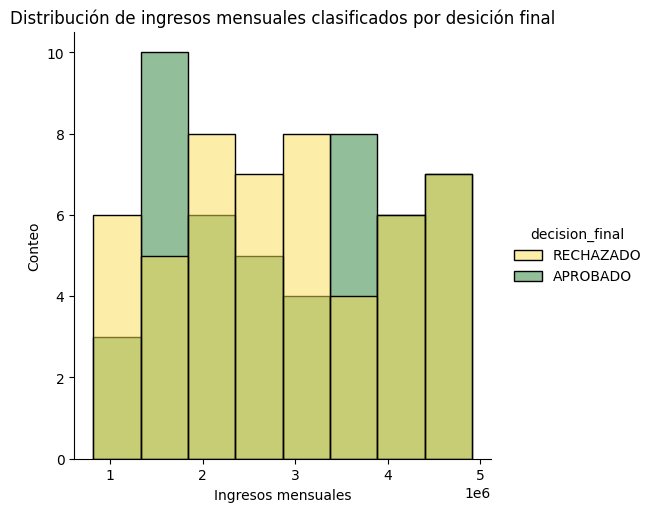

In [205]:
#Anàlisis sobre el score crediticio
fig = plt.figure(figsize=(12,8))
sns.displot(data=data,x='ingresos_mensuales',hue='decision_final',palette=custom_palette)
plt.title('Distribución de ingresos mensuales clasificados por desición final')
plt.xlabel('Ingresos mensuales')
plt.ylabel('Conteo')
plt.show()

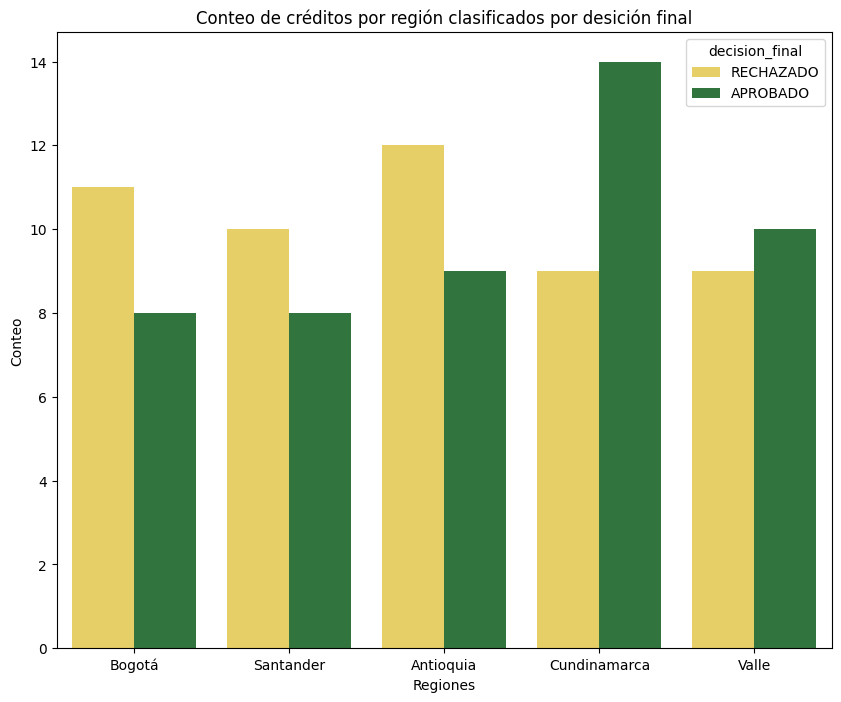

In [227]:
#Análisis sobre las regiones
fig = plt.figure(figsize=(10,8))
sns.countplot(data=data,x='region',hue='decision_final',palette=custom_palette)
plt.title('Conteo de créditos por región clasificados por desición final')
plt.xlabel('Regiones')
plt.ylabel('Conteo')
plt.show()

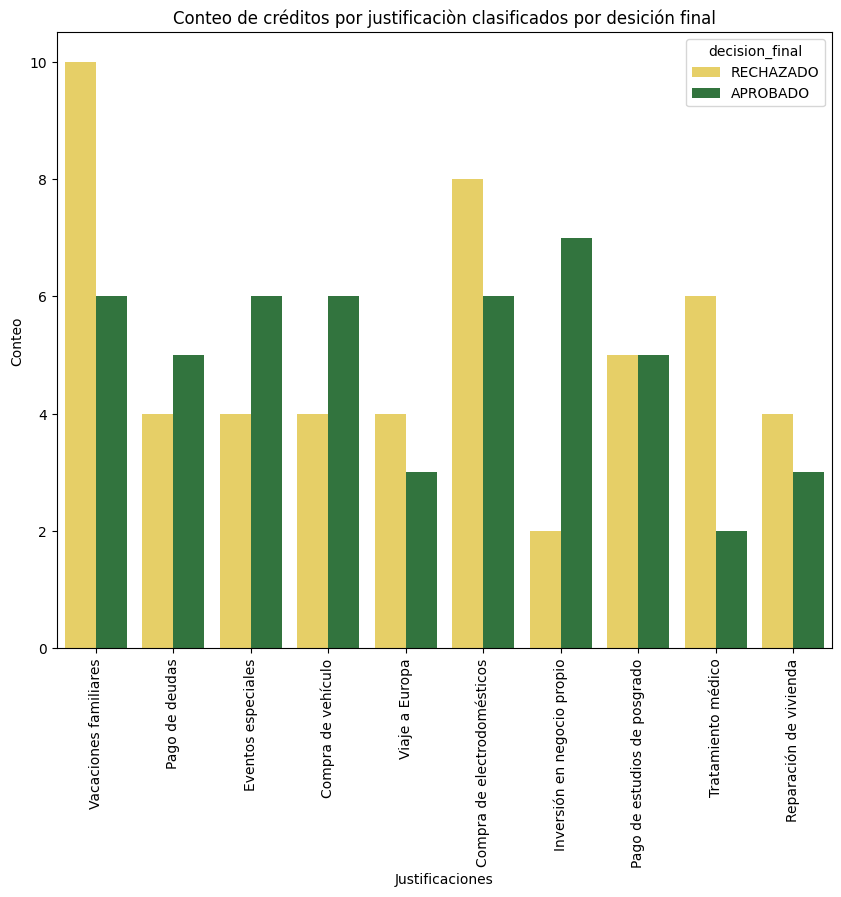

In [228]:
#Análisis sobre las justificaciones
fig = plt.figure(figsize=(10,8))
sns.countplot(data=data,x='justificacion',hue='decision_final',palette=custom_palette)
plt.title('Conteo de créditos por justificaciòn clasificados por desición final')
plt.xlabel('Justificaciones')
plt.ylabel('Conteo')
plt.xticks(rotation=90)
plt.show()

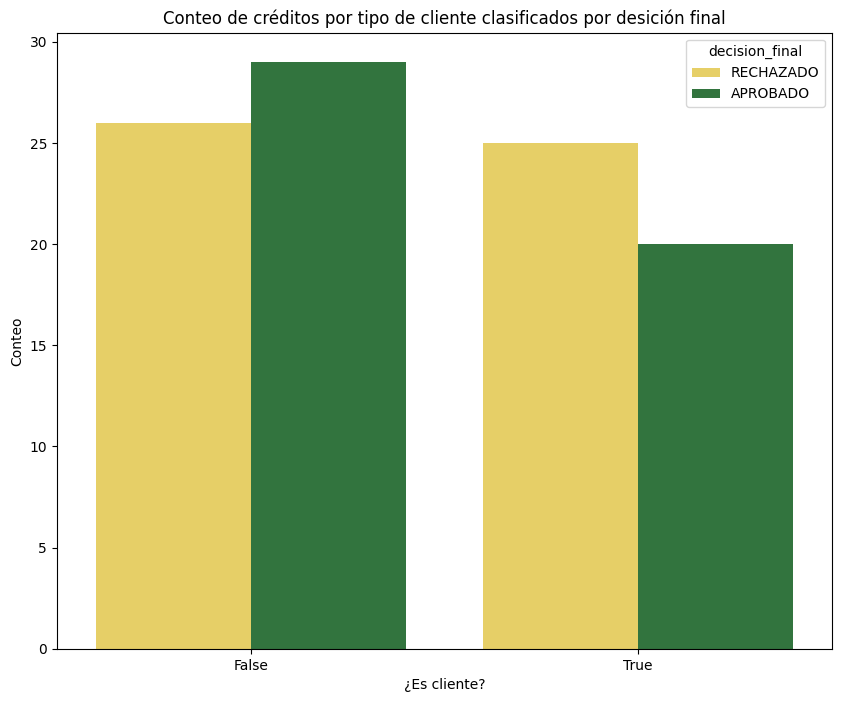

In [229]:
#Análisis sobre la relaciòn con el cliente
fig = plt.figure(figsize=(10,8))
sns.countplot(data=data,x='es_cliente',hue='decision_final',palette=custom_palette)
plt.title('Conteo de créditos por tipo de cliente clasificados por desición final')
plt.xlabel('¿Es cliente?')
plt.ylabel('Conteo')
#plt.xticks(rotation=90)
plt.show()